# <u>BRAIN File Format Tutorial</u>

<ul>
<li><a href='#Basics'>Basics</a>
<ul>
<li><a href='#Creating-a-new-BrainFile'>Creating a new BrainFile</a></li>
<li><a href='#Overview-of-the-File-Structure-and-API'>Overview of the File Structure and API</a></li>
<li><a href='#File-Validation'>File Validation</a></li>
<li><a href='#Retrieving-Objects'>Retrieving Objects</a></li>
<li><a href='#Creating-EcOG-Data'>Creating EcOG Data</a></li>
<li><a href='#Modifying/Writing-Ephys-Data'>Modifying/Writing Ephys Data</a></li>
<li><a href='#Reading-Ephys-Data'>Reading Ephys Data</a>
<ul>
<li><a href='#Raw-Data'>Raw Data</a></li>
<li><a href='#Dimensions/Axes'>Dimensions/Axes</a></li>
<li><a href='#Layout-Data'>Layout Data</a></li>
<li><a href='#Anatomy-Data'>Anatomy Data</a></li>
</ul>
</li>
<li><a href='#Processed-Ephys-Data'>Processed Ephys Data</a></li>
<li><a href='#Self-contained-Vs.-Modular-Files'>Self-contained Vs. Modular Files</a></li>
</ul>
</li>   

<li><a href='#An-Introduction-to-Data-Annotations'>An Introduction to Data Annotations</a>
<ul>
<li><a href='#Interacting-with-Collections-of-Annotations'>Interacting with Collections of Annotations</a>
<ul>
<li><a href="#Filtering-Annotations">Filtering Annotations</a>
<ul>
<li><a href="#Defining-Annotation-Filters">Defining Annotation Filters</a>
<li><a href="#Combining-Annotation-Filters">Combining Annotation Filters</a>
<li><a href='#Containment-Graph-and-Filtering'>Containment Graph and Filtering</a></li>
</ul>
</li>
<li><a href='#Selecting-Annotations'>Selecting Annotations</a></li> 
<li><a href='#Retrieving-Annotation-Objects'>Retrieving Annotation Objects</a></li>
<li><a href='#Accessing-Data-via-Annotations'>Accessing Data via Annotations</a></li>
<li><a href='#Adding-new-Annotations'>Adding New Annotations</a></li>
</ul>
<li><a href='#Interacting-with-Individual-Annotations'>Interacting with Individual of Annotations</a>
<ul>
<li><a href='#Data-Selections'>Data Selections</a></li>
<li><a href='#Combining-Data-Selections-and-Annotations'>Combining Data Selections and Annotations</a></li>
<li><a href='#Comparing-Data-Selections-and-Annotations'>Comparing Data Selections and Annotations</a></li>
</ul>
</li>
<li><a href='#Annotations:-Storage-and-Limitations'>Annotations: Storage and Limitations</a>
<ul>
<li><a href='#How-are-Data-Selections-Defined?'>How are Data Selections Defined?</a></li>
<li><a href='#How are Collection of Annotations Stored?'>How are Collection of Annotations Stored?</a></li>
</ul>
</li>
</ul>
</li> 
</ul>

<small>This page is available as interactive iPython Notebook as part of the following bitbucket repo: <br> https://bitbucket.org/oruebel/brainformat (see <u>`brain/examples/brainformat_brief_introduction.ipynb`</u>)</small>
<br><br><br>  

# Basics

The BrainFormat library is available on bitbucket at <a href="https://bitbucket.org/oruebel/brainformat">https://bitbucket.org/oruebel/brainformat</a>. 

<u>Local Installation:</u>

* Required libraries: <b>h5py</b> (<a href="http://www.h5py.org/">http://www.h5py.org/</a>) and <b>numpy</b> (<a href="http://www.numpy.org/">http://www.numpy.org/</a>)
* The brain.readers.htkcollection also requires <b>scipy</b> (<a href="http://www.scipy.org/">http://www.scipy.org/</a>) for reading of .mat files. This is relevant if HTK format support is needed.
* Currently installation scripts are not yet available. However, the library is written in pure Python, so simply set the PYTHONPATH to the main folder of the checked-out version of the repo (where the folder brain is located) and the library should be good to go.

<u>Installation at NERSC</u>

The library is installed at NERSC at `/project/projectdirs/m2043/brainformat`. A module file for using the library at NERSC is available. Simply execute:

    `module use /global/project/projectdirs/m2043/brainformat/modulefiles`
    `module load brainformat`

Alternatively you can also call:

    `source /project/projectdirs/m2043/brainformat/setup_environment`

In [1]:
# Import basic packages needed for this notebook
import sys
import numpy as np
from IPython.display import Image 
# If the brain lib is not installed then set the path to it
sys.path.append("/Users/oruebel/Devel/BrainFormat")

## Creating a new BrainFile

In [2]:
from brain.dataformat.brainformat import *
filename = '/Users/oruebel/Devel/BrainFormat/my_first_brainfile.h5'
multi_filename = '/Users/oruebel/Devel/BrainFormat/my_first_multi_brainfile.h5'  # Used later
my_file = BrainDataFile.create(filename)

## Overview of the File Structure and API

We now have a new HDF5 file that is initalized with all mandatory elements of the format. The figure below shows an overview of the file's structure. The file contains the base groups for storing data and metadata. Groups in HDF5 are similar to folders on your computer.

Data recordings and analysis are stored in the <b>data</b> group, which itself contains two subgroups i) <b>data/internal</b> for storage of data internal to the brain and ii) <b>data/external</b> for external data, e.g., observations recorded as part of an experiment.

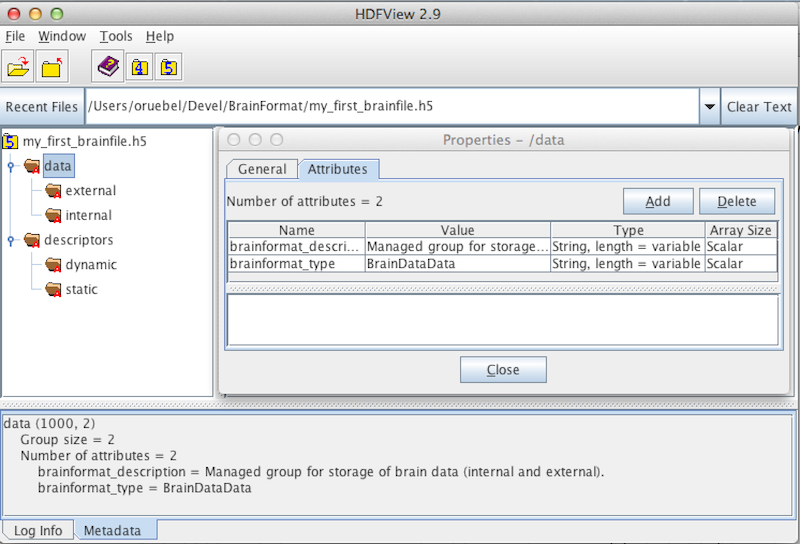

In [3]:
Image(filename="brainformat_brief_introduction/my_first_brainfile_base.png", width=600)

The above figure illustrates the core strucutre of the HDF5 file. We see a number of HDF5 Groups (folders). In the BrainData API, semantic (high-level) objects in the file are associated with corresponding classes in the API which are responsible for creating, managing, and providing access to the content of that object. We refer to any HDF5 object (e.g., Group, Dataset, File) that has an associated manager class as a <b>managed object</b>. This concept is defined in the <b>brain.dataformat.base</b> module, which defines the following base classes:

<ul>
<li><b>ManagedObject(hdf_object)</b> 	Abstract base class defining the base API for managed objects. All other classes in this module inherit from ManagedObject.
<li><b>ManagedGroup(hdf_object)</b> 	Base class for specification of managed h5py.Group objects.
<li><b>ManagedDataset(hdf_object)</b> 	Base class for specification of managed h5py.Dataset objects.
<li><b>ManagedFile(hdf_object)</b> 	Base class for specification of managed h5py.File objects.
</ul>

The module <b>brain.dataformat.brainformat</b> builds on top of the managed object concept and defines the different modules for managing the content of BrainData files. Some of the main classes defined by brainformat API are:

<ul>
  <li><b>BrainDataFile(...)</b> 	Class for management of HDF5 brain files.</li>
  <li><b>brain.dataformat.brainformat.BrainDataData(...)</b> 	Class for management of the data group for storage of brain recordings data.</li>
  <li><b>BrainDataInternalData(...)</b> 	Class for management of the ‘internal’ group for storage of brain recordings data.</li>
  <li><b>BrainDataExternalData(...)</b> 	Class for management of the ‘external’ group for storage of recordings external to the brain.</li>
  <li><b>BrainDataDescriptors(...)</b> 	Class for management of the descriptors group for storage of data descriptions and metadata.</li>
  <li><b>BrainDataStaticDescriptors(...)</b> 	Class for management of the ‘static’ group for storage of static data descriptors.</li>
  <li><b>BrainDataDynamicDescriptors(...)</b> 	Class for management of the ‘dynamic’ group for storage of dynamic data descriptors.</li>
  <li><b>BrainDataEphys(...)</b>	Class for management of managed h5py.Group objects structured to store Ephys brain recording data.</li>
  <li><b>BrainDataEphysProcessed(...)</b> 	Class for management of h5py.Group objects structured to store processed Ephys brain recording data.</li>
</ul>

Detailed documentation of the full API is available in the developer SPHINX documentation available in docs folder. Pre-build versions of the developer documentation in HTML (recommended) and PDF form are also available as part of the bitbucket repo here: https://bitbucket.org/oruebel/brainformat/downloads

## File Validation

All objects in the BrainFormat have a well-defined specification. The API provides basic functionality to verify that specific object or complete files follow the BrainFormat specification.

In [4]:
print my_file.check_format_compliance()

True


We can retrieve the specification for a given type by itself or ask the library to recursively resolve the specification, i.e., also include the specification of all managed objects contained in the spec.

In [5]:
# Specification for just the BrainDataFile object
object_spec = BrainDataFile.get_format_specification()
# Specifcation for the BrainDataFile and all contained objects
full_spec = BrainDataFile.get_format_specification_recursive() 
# Note: The specifcations are class bound, i.e,. calling the function on my_file would yield the same result.
# Convert the spec to JSON if desired 
import json
json.dumps(object_spec)

'{"prefix": "entry_", "datasets": {}, "group": null, "managed_objects": [{"optional": false, "format_type": "BrainDataData"}, {"optional": false, "format_type": "BrainDataDescriptors"}], "groups": {}, "attributes": [], "file_extension": ".h5", "optional": false, "file_prefix": null, "description": "Managed BRAIN file."}'

The above looks at the specification of the format as defined by the BrainFormat library. However, format specifications may change and evolve over time. As part of the core file format, the specification of a managed object is always saved as a JSON string in the format_specification attribute of the managed object in the file. This allows us to easily check whether the specification of an object as described in the file is consistent with the current spec given by the library. 

In [6]:
print "Use the API to check if the format has changed: (expected False)"
print my_file.format_specification_changed()  

print "Manually check if the specifications as given in the file and by the library are the same: (expected: True)"
temp1 = my_file.get_format_specification_from_file()  # Get the format spec as indicated in the file. 
                                                      # The spec is automatically converted to a python dict. 
temp2 = my_file.get_format_specification()  # Get the current format spec as defined by the library
# We can compare the two specs manually or we can simply use the helper function provided by the API
print temp1 == temp2  # Compare the two specs manually. We expect True, i.e., the specs match.

Use the API to check if the format has changed: (expected False)
False
Manually check if the specifications as given in the file and by the library are the same: (expected: True)
True


## Retrieving Objects

Retrieval of managed objects from file is generally supported by manager classes via two mechanisms:

In [7]:
# 1) Access objects using getter functions
internal = my_file.data().internal()
print internal

In [8]:
# 2) Access objects using dictionary-like key slicing
internal = my_file['data']['internal']
print internal

Note, if an object in the HDF5 file is managed (i.e., if the object has a manager class associated with it), then the API will return a corresponding instance of the respective class. If the requested object is not managed---e.g., a dataset that is contained in a managed group but that does not have its own API class---then the corresponding h5py object will be returned. For managed objects we can always retrieve the corresponding h5py obect via the <b>get_hpy(...)</b> function:

In [9]:
i5 = internal.get_h5py()
print type(i5)
BrainDataFile.get_managed_object(i5)

<class 'h5py._hl.group.Group'>


In addition to the format specification, validation, and get_h5py access, the base <b>ManagedObject</b> class---from which all manager classes inherit---provides a number of additional helper functions:

In [10]:
print "Example1: Get all objects of a given type contained in a given parent group"
# Get all h5py objects managed by BrainDataInternal 
temp1 = BrainDataInternalData.get_all(parent_group=my_file.data(), get_h5py=True)   
# Get all BrainDataInternal objects for the parent
temp2 = BrainDataInternalData.get_all(parent_group=my_file.data(), get_h5py=False) 
print temp1
print temp2

print ""
print "Example 2: Check if an h5py object is managed."
temp1 = BrainDataFile.is_managed(internal.get_h5py())  # Works also for ManagedObject instances
print temp1

print ""
print "Example 3: Check if an object is managed by a particular class"
# NOTE: Here we need to call the is_managed_by function from the class we want to check the object against
temp1 = BrainDataInternalData.is_managed_by(internal.get_h5py())  # Works also for ManagedObject instances
print temp1

print ""
print "Example 4: Given an h5py object, get an instance of the corresponding manager class"
# NOTE: Here it is recommended to call the get_managed_object function from any of the core BrainData API classes.
#       Calling ManagedObject.get_managed_object(...) will work as well, however, if there are many 
#       import any derived file API's and as such does not know the classes associated with 
#       the BrainData API. The brain.dataformat.base may be used to define many different formats.
temp1 = BrainDataFile.get_managed_object(internal.get_h5py())   # Works also for ManagedObject instances
print temp1

print ""
print "Example 5: Inspect the user-defined, optional id of the object. This feature may be used, e.g., to asign a DOE number."
temp1 = internal.has_object_id()
temp2 = internal.get_object_id()
print temp1
print temp2

print ""
print "Example 6: Adding an object id and deleting the object id"
# Adding the object id
internal.set_object_id(10) 
temp1 = internal.get_object_id()
print temp1
# Deleting the object id. By setting the object id to None it will be deleted
internal.set_object_id(None)  
temp2 = internal.get_object_id()
print temp2

print ""
print "Example 7: Get name of the file where a managed object is stored."
print internal.get_filename(absolute_path=True)  # Option 1: Use the helper function provided by ManagedObject
print internal.get_h5py().file.filename          # Option 2: Get the h5py object and use its logic
print internal.file.filename                     # Option 3: The attributes of the managed h5py object are mapped to 
                                                 #           manager object so we can also shortcut Option 2

Example1: Get all objects of a given type contained in a given parent group
[<HDF5 group "/data/internal" (0 members)>]

Example 2: Check if an h5py object is managed.
True

Example 3: Check if an object is managed by a particular class
True

Example 4: Given an h5py object, get an instance of the corresponding manager class

Example 5: Inspect the user-defined, optional id of the object. This feature may be used, e.g., to asign a DOE number.
False
None

Example 6: Adding an object id and deleting the object id
10
None

Example 7: Get name of the file where a managed object is stored.
/Users/oruebel/Devel/BrainFormat/my_first_brainfile.h5
/Users/oruebel/Devel/BrainFormat/my_first_brainfile.h5
/Users/oruebel/Devel/BrainFormat/my_first_brainfile.h5


Other possible interesting functions include:

    >>> internal.close()  # Close the file that contains the managed object
    >>> internal.get_managed_object_type() # One of 'file', 'dataset', or 'group'

## Creating EcOG Data

In [11]:
# Creating a dummy list of anatomy names
import random
import string
import numpy as np
def random_string(length):
    char_set = string.ascii_uppercase + string.digits
    return ''.join(random.sample(char_set*length, length))
my_ana_names = np.repeat( np.asarray([random_string(3) for x in range(16)]) , 16 )

In [12]:
# Creating a dummy layout
my_layout = np.arange(256).reshape(16,16)

In [13]:
# Creating dummy ephys data
my_ephys = np.arange(256*10000).reshape(256,10000)

In [14]:
# Create a basic Ephys data container, without specifying any data
ephys_data0 = BrainDataEphys.create(parent_object=internal,
                                  ephys_data_shape=(256,10000),
                                  ephys_data_type='float32',
                                  sampling_rate=16)
# Create a full dataset populated with data
ephys_data_1 = BrainDataEphys.create(parent_object=internal,
                                   ephys_data=my_ephys,
                                   anatomy_names=my_ana_names, # We can ommit anatomy_ods as they will be autogenerated
                                   layout=my_layout,
                                   start_time=0,  # Default value is 0
                                   sampling_rate=16)

The above code illustrated two ways to generate an EcoG dataset: i) by specifying only the type and shape of the dataset we generated an empty dataset <b>ephys_data0</b> (i.e., empty values are completed with numpy NaN values upon read) and ii) by providing an explicit data array we generated <b>ephys_data1</b> which contains our user-defined data. 

Optionally we may also specify the following items. We will discuss layout and anatomy later in more detail:
* <b>layout</b>: A numpy array of ints describing for each channel index (i.e, the integer index of the electrode) its location in the layout matrix. Use -1 to indicate unoccupied channels. This strategy allows complex layouts to be described via a single rectangular matrix.
* <b>anatomy_names</b>: 1D array of strings with the name of the region an electrode is located in. The array should have the same length as the number of electrodes. Currently, numpy does not support NaN values for strings and integrers, use empty strings in the anatomy_names arrary with unknown anatomy names. 
* <b>anatomy_ids</b>: 1D array of ints with the integer id's of the regions the electrode. Note, if anatomy_names is given and anatomy_ids is empty, then the array will be autogenerated by creating an index for the unique values in the anatomy_names array. Similar to the anatomy_names array, the array should have the same length as the number of electrodes. Currently, numpy does not support NaN values for integrers, negative -1 values should be used to indicate electrodes that do not have a anatomy name assigned. 
* <b>start_time</b>: Start time of the recording in time since epoch (default behavior by time.time()) The Unix epoch (or Unix time or POSIX time or Unix timestamp) is the number of seconds that have elapsed since January 1, 1970 (midnight UTC/GMT), not counting leap seconds (in ISO 8601: 1970-01-01T00:00:00Z). Literally speaking the epoch is Unix time 0 (midnight 1/1/1970), but 'epoch' is often used as a synonym for 'Unix time'

The figure below shows the structure of the file after we have added the two dummy EcOG datasets to our example file. The base EcOG data group here contains datasets for the <b>raw_data</b>, <b>sampling_rate</b>, and two datasets, <b>time_axis</b> and <b>electrode_id</b>, which describe the axes of the 2D raw_dataset (space $\times$ time). In addition to the <b>electrode_id</b> dataset, we may also have additional datasets to further describe the anatomy of the spatial dimension of the raw data. NOTE: the <b>electrode_id</b> and <b>time_axis</b> are directly linked to the <b>raw_data</b> via the concept of DimensionScales in HDF5 (more on this topic maybe later). In addition to all these components, we also find a Group (folder) which contains the datastructures for storing annotations of the raw data. An introduction to the concept of data annotations will be provided later. Next, lets see how we can interact with the EcoG data through reading and writing data.  

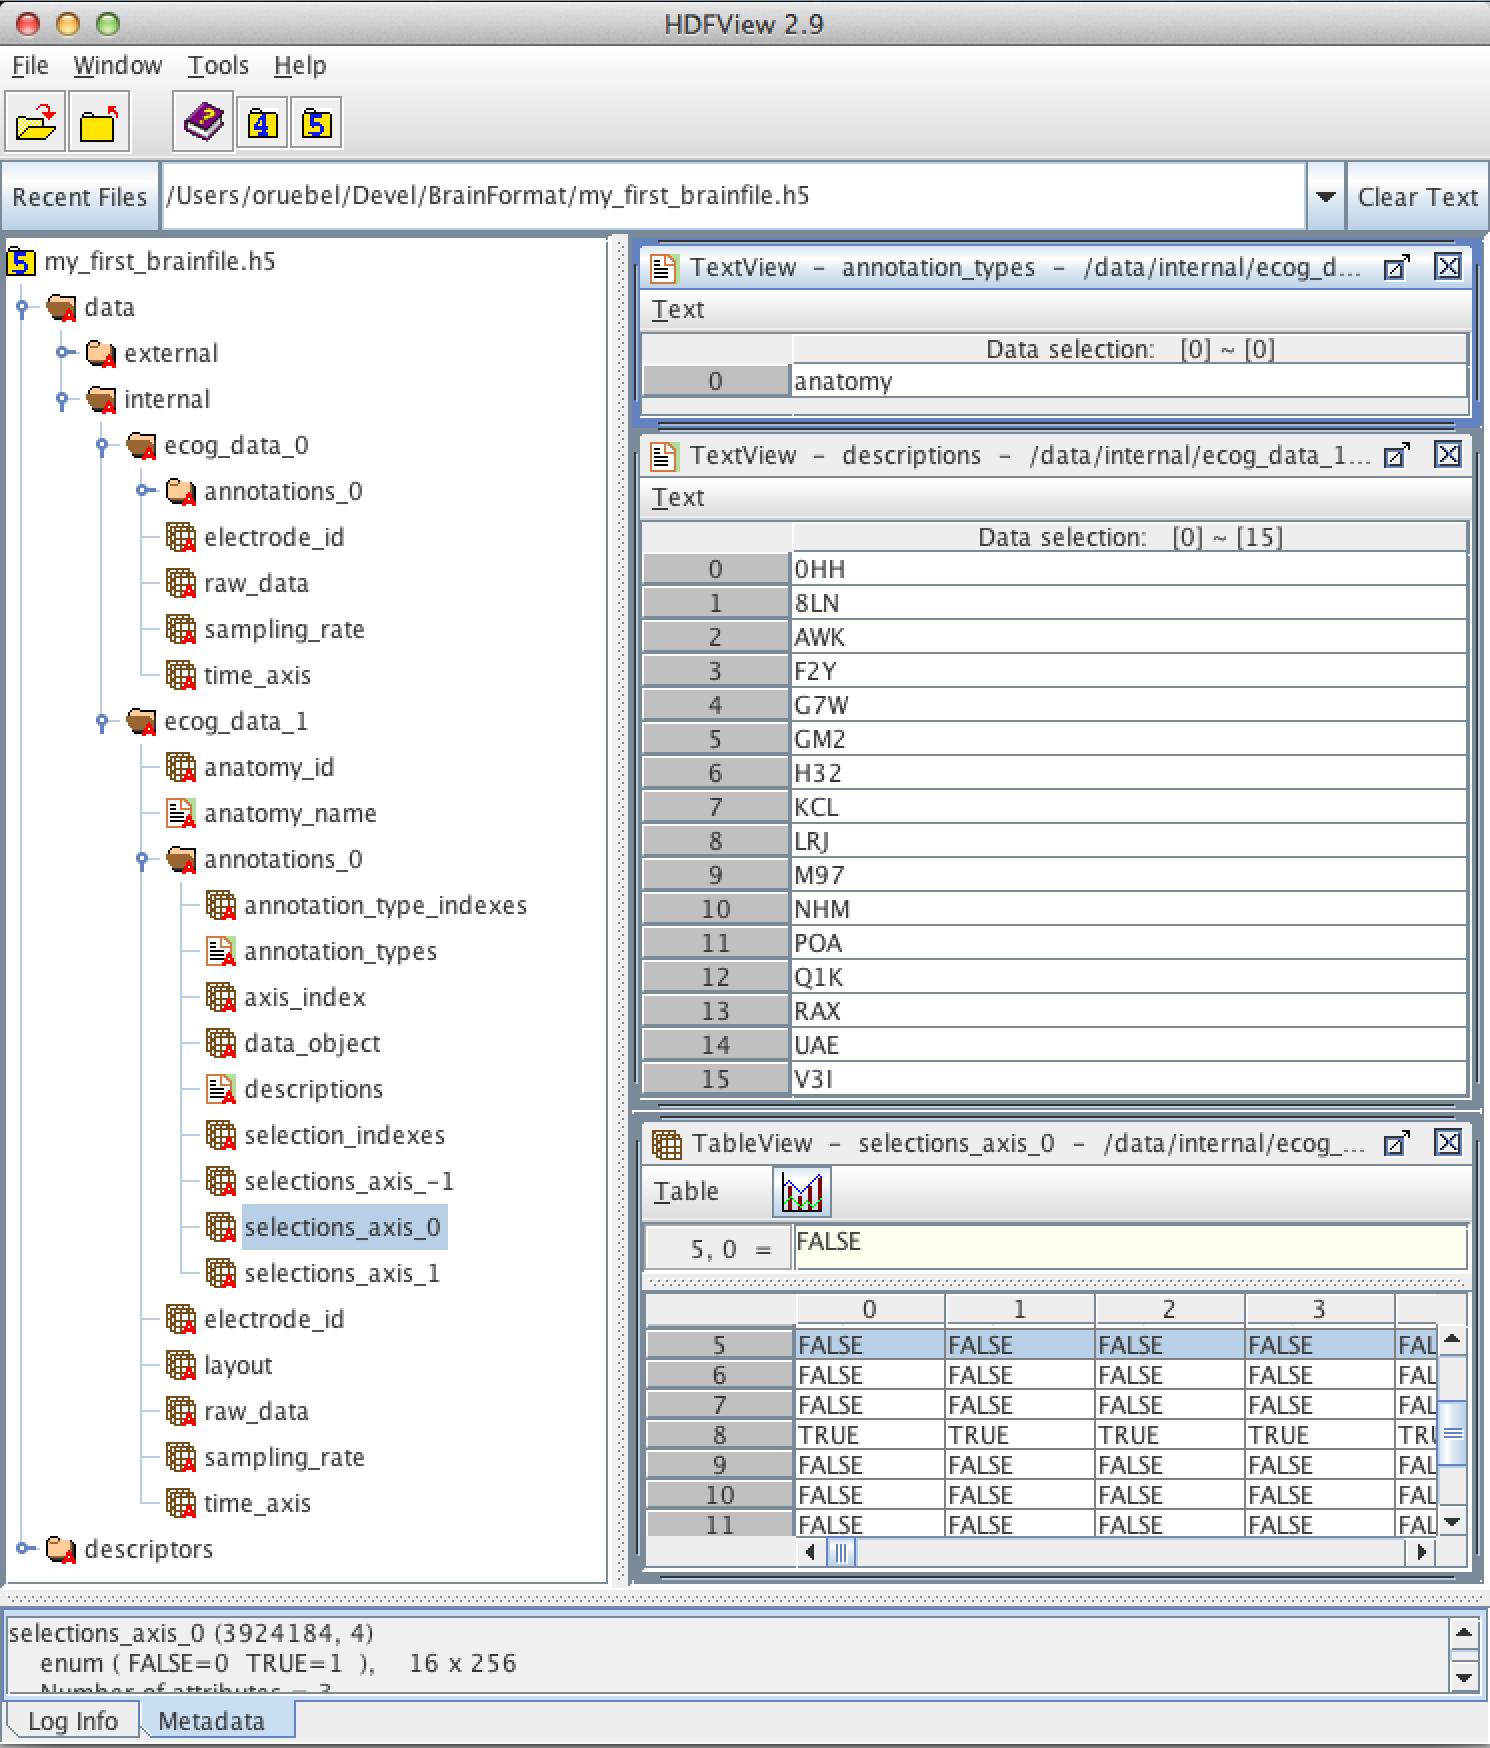

In [15]:
Image(filename="brainformat_brief_introduction/my_first_brainfile_base_2.png", width=600)

## Modifying/Writing Ephys Data

In the previous section we have generated two EcOG dataset. As shown for <b>ephys_data1</b> we can have the API write all data directly at creation of the new BrainDataEphys group. However, for the first EcOG dataset we only requested space for a (256 $\times$ 10000) data array, but we did not write data. Below we show how we can update the data and add missing elements (e.g., omitted layout or anatomy data). 

In [16]:
# Writing raw ephys data
ephys_data0[2, 1:10] = 1
print type(ephys_data0)
ephys_data0.ephys_data()[2:3, 0:5] = 2

<class 'brain.dataformat.brainformat.BrainDataEphys'>


In [17]:
# Writing sampling rate
ephys_data0.sampling_rate()[()] = 16

In [18]:
# Adding a layout dataset after the fact. 
layout = ephys_data0.layout(new_layout=my_layout)

<b>NOTE:</b> This only works if no layout data is already saved for the data. If a layout has already been specified, then a KeyError will be raised. However, we can still modify the layoutafter the fact via `ephys_data0.layout()[:] = ...

In [19]:
# Adding anatomy data to the dataset after the fact.
anatomy_annotations = ephys_data0.create_ephys_annotation_collection('anatomy')
anatomy_names, anatomy_ids = ephys_data0.anatomy(anatomy_names=my_ana_names,
                                                annotation_data_group=anatomy_annotations)

<b>NOTE:</b> This only works if no anatomy data is already saved for the data. If an anatomy has already been specified, then a KeyError will be raised. However, we can still modify the anatomy.<br>
<b>NOTE:</b> If we only provide the anatomy_names then the anatomy_ids array will be create automatically. However, if only the anatomy_ids are given then the anatomy_names remain uninitialized.<br>
<b>NOTE:</b> By providing the annotation_data_group object as input the API will automatically transform the anatomy also to annotations instead of just storing them as dimensions scales with the dataset. If we omit it, then the annotation will only be stored as dimensions scales.

## Reading Ephys Data

### Raw Data

In [20]:
# Get the sampling rate
print ephys_data0.sampling_rate()
print ephys_data0.sampling_rate(get_hdf=False)

<HDF5 dataset "sampling_rate": shape (), type "<i8">
16


In [21]:
# The BrainDataEphys class supports array slicing, so that we can
# directly use the ephys_data0 object to read and write the raw data
signal_elec10 = ephys_data0[10, :]  # Full signal for electrode 10
signal_time_100_200 = ephys_data0[: , 100:200] # Signal of all electrodes during the time index 100 to 200

# Updating the Ephys data works the same way as described in the previous section

# Alternatively we can also access the h5py dataset directly via
ephys_h5py = ephys_data0.ephys_data()
# We now can interact with ephys_h5py using array slicing the same
# way as shown above for ephys_data0

### Dimensions/Axes

In addition to the raw data we also store additional information to describe the different dimensions of the dataset. This is implemented in HDF5 via the concept of Dimension Scales. For raw Ephys data we currently support the following dimension information:

* `space` : `axis=0`:

    * `electrode_id` (unit `id`) : Indicating the id's of the electrodes (mandatory)
    * `anatomy_name` : Optional description of the anatomy, indicating for each electrode the name of the physical location.
    * `anatomy_id` : Optional description of the anatomy, indicating for each electrode id of the physical location.
    
* `time` : `axis=1`: `unit='ms': Recording time in mili seconds.

In [22]:
# Getting a dict of all dimenions. The returned data is a list containing 
# for each dimension a list of dicts, where each dict describes a dimensions scale
dimensions = ephys_data0.dims(get_hdf=False)
print dimensions

[[{'description': 'Id of the recording electrode', 'axis': 0, 'name': u'space', 'unit': u'id', 'dataset': <HDF5 dataset "electrode_id": shape (256,), type "<i8">}, {'description': 'Integer id of the region location of the electrodes', 'axis': 0, 'name': u'space', 'unit': u'region name', 'dataset': <HDF5 dataset "anatomy_name": shape (256,), type "|S3">}, {'description': '', 'axis': 0, 'name': u'space', 'unit': u'region id', 'dataset': <HDF5 dataset "anatomy_id": shape (256,), type "<i8">}], [{'description': 'Sample time in ms', 'axis': 1, 'name': u'time', 'unit': u'ms', 'dataset': <HDF5 dataset "time_axis": shape (10000,), type "<f8">}]]


In [23]:
# Getting all dimensions scales for a particular axis index
print ephys_data0.dims(axis=1, get_hdf=False)

[{'description': 'Sample time in ms', 'axis': 1, 'name': u'time', 'unit': u'ms', 'dataset': <HDF5 dataset "time_axis": shape (10000,), type "<f8">}]


Since the dimensions information is stored as HDF5 Dimensions Scales, we can alternatively also access the scales directly via the h5py API for the dataset of the raw Ephys data:

In [24]:
# Getting a dict of all dimensions with arrays provided as h5py.Dataset objects
dimensions = ephys_data0.dims()
print dimensions
# Alternatively, we can also retrieve the h5py dimensions object via: 
ephys_data0.ephys_data().dims
# If you prefer the use of the h5py API for interacting with dimension scales then 
# see here for further details: http://docs.h5py.org/en/latest/high/dims.html

<Dimensions of HDF5 object at 4498703296>


<Dimensions of HDF5 object at 4498706096>

NOTE: The Ephys API provides functionallity to add new, custom dimension scales that are not part of the original format specification. This is useful, e.g., if we need mutliple different time axis. The following example illustrates how we can easily add a new dimension scale for Ephys data:

In [25]:
# In this example we are creating a new dimensions scale to describe a globally algined time axis
global_time = np.arange(10000) + 100 # The array describing an example globally aligned time
ephys_data0.add_dimension_scale(scale=global_time, 
                               unit='global_time (ns)',
                               axis='time', # We could also use axis=1 here
                               description='The time regristered to the global clock'
                               ) # In this case we let the API determine the name of the dataset, but we could also
                                 # set the parameter dataset_name=... to the desired name.

<HDF5 dataset "time_global_time (ns)": shape (10000,), type "<i8">

In [26]:
# For illustration purposes lets look at the scales available for the time dimensions
print ephys_data0.dims(axis='time', get_hdf=False) # Again, we may here use axis=1 instead as well

[{'description': 'Sample time in ms', 'axis': 1, 'name': u'time', 'unit': u'ms', 'dataset': <HDF5 dataset "time_axis": shape (10000,), type "<f8">}, {'description': 'The time regristered to the global clock', 'axis': 1, 'name': u'time', 'unit': u'global_time (ns)', 'dataset': <HDF5 dataset "time_global_time (ns)": shape (10000,), type "<i8">}]


### Layout Data

In [27]:
# Does our dataset have a layout specified
ephys_data0.has_layout()

True

In [28]:
# Get the h5py dataset describing the layout
layout_h5py = ephys_data0.layout() 

# To load the data array describing the layout we can use on of the following two ways
layout_numpy = ephys_data0.layout(get_hdf=False)
layout_numpy = ephys_data0.layout()[:]
print layout_numpy

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

In [29]:
# As already mentioned above, we can write a new layout if none exists via
# layout = ephys_data0.layout(new_layout=my_layout)

# We can modify a layout simply by directly updating the h5py.Dataset object retruned by the .layout() function.
layout_h5py = ephys_data0.layout() 
layout_h5py[0,0] = 0

### Anatomy Data

In [30]:
# Does our dataset have anatomy data specified
ephys_data0.has_layout()

True

In [31]:
# Get the h5py datasets associated with the anatomy
anatomy_names_h5py, anatomy_ids_h5py = ephys_data0.anatomy()
print (anatomy_names_h5py, anatomy_ids_h5py)

# To load the data arrays describing the anatomy we can do either:
anatomy_names, anatomy_ids = ephys_data0.anatomy(get_hdf=False)
print (type(anatomy_names), type(anatomy_ids))
# Or alternatively we can load the data ourselves from the h5py.Dataset objects
anatomy_names_h5py, anatomy_ids_h5py = ephys_data0.anatomy()
anatomy_names = anatomy_names_h5py[:]
anatomy_ids = anatomy_ids_h5py[:]

#NOTE: In practice we will have to check wheter the returned anatomy_names 
#and/pr anatomy_ids are `None` as the anatomy is optional and may be defined
#by ids and/or names.

(<HDF5 dataset "anatomy_name": shape (256,), type "|S3">, <HDF5 dataset "anatomy_id": shape (256,), type "<i8">)
(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)


As already mentioned above, we can write a new anatomy if none exists via: 

`anatomy_names, anatomy_ids = ephys_data0.anatomy(anatomy_names=my_ana_names, annotation_data_group=ephys_data0.annotations(0))`

As with the layout, we can modify annotations simply by directly updating the h5py.Dataset object retruned by the .anatomy() function. CAUTION: When modifying the layout we need to ensure that the anatomy_names and anatomy_ids are consistent.

In [32]:
# Upon creating we provided the anatomy function with an AnnotationDataGroup object. 
# As such, the annotations are not only stored as dimensions scales associated with
# the data, but are also transformed into annotations.
anatomy_annotations = ephys_data0.annotations(0)

# More details on how to interact with annotations will be provided later on.

## Processed Ephys Data

Processed Ephys data is stored and managed by <b>BrainDataEphysProcessed</b> manager class which inherits from and extends the <b>BrainDataEphys</b> class used for interacting with raw Ephys. The main difference to raw Ephys data are:

1. Processed data may have multiplebands and as such is stored as a 3D dataset of (`space` $\times$ `time` $\times$ `bands`). The base specification for processed data defines a number of optional implementations for the bands dimensions:
    * <b> Frequency bands</b> This is used in case that the data has been decomposed into frequency bands. In this case a new dimensions-scale describing the frequency bands in Hz is associated with the third dimension of the data cube.
    * <b> Tokens</b> This functionality is used when the data is decomposed into tokens. In this case a new dimension scale for the token ids. If token names are given as well, then a separate dimension scale will be create for those as well. In addition to storage as dimensions scale, tokens are also automatically translated to annotations and stored in a separate `AnnotationsDataGroup` (i.e., a collection of annotations; see below for details).
3. Added optional `original_name` attribute used to describe the name of the dataset as specified by the user that has been processed. 
4. The dataset used to store the recording data in file is called `processed_data` rather than `raw_data`
5. The units for the recorded value is user-defined rather than fixed to `Volts`
6. In contrast to the raw Ephys data, processed data is often not just floating point data but is stored as complex numbers consiting of a real and imaginary part. This is achieved using numpy's complex numbers support which are automatically translated by h5py to a corresponding compound data type. We can generate a complex number in numpy easily as follows: Assuming we have two real-valued numpy arrays `a` and `b` (e.g, `a=np.arange(20).reshape((2,5,2))`), we can create a complex number array `c` simply via $c = a + 1j*b$

Other then these basic differences, the processed Ephys data API behaves essentially the same as the API for managing raw Ephys data.

In [33]:
# Create a full dataset populated with data
ephys_processes_1 = BrainDataEphysProcessed.create(parent_object=internal,
                                        ephys_data_units='Volts',
                                        ephys_data=np.arange(10*20*30).reshape((10,20,30)),
                                        token_ids=np.arange(30))
# Just to illustrate that we in now also have an annoation collectio for the tokens, here the list of annotation collections
[a.collection_description for a in ephys_processes_1.annotations()]

['tokens']

## Self-contained Vs. Modular Files

So far we have generated **self-contained files**, i.e., all content (datasets, groups etc.) were stored in the file directly. This is the default behavior of the library. Self-contained files have the advantage that we can share and access a single file without having to worry about manaing a complex collection of many files. 

The concept of **modular files** describes the concept of storing different components of a data collection as separate files, rather than storing everythin in a single file. Being able to store components of a larger data collection in separate files has the advantage that the size of the indiviual files is smaller and that we can more easily share different components of a data collections with others. However, when storing related data in multiple files, additional care must be taken to manage the different files. 

The BrainFormat library supports the creation of modular files through the concept of `external` creation of ManagedObjects. When creating a new managed object using the `create` function we can simply set `.create(..., external=True)`. This will place the new managed object in a separate file managed by the **ManagedObjectFile** class. The name of the external file is determined by the library based on a combination of i)the name of file that contains the parent object and ii) the path of the new managed object within the parent file. The ManagedObjectFile is part of the `brain.dataformat.base` base format module and provides a generic container for storing arbitrary colletions of managed objects.

In order make it easy to navigate modular files, the ManagedObject.create function generates an external link in the proper location in the parent file. The concept of **external links** in HDF5 enables us to interact with HDF5 objects stored in another file as if it where contained in the same file. This means, independent of whether a file is self-contained or modular, we can interact with the BrainFile in the same way, i.e, we can simply open the main Brain file and navigate the file using the BrainFormat library as usual. 

<font color='red'>**WARNING** It's currenlty impossible to open an external link if the destination file is already open with close degree H5F_CLOSE_STRONG (all h5py files are currently opened in this fashion). While there is some indication that this may change in the future, i.e., h5py may eventually be moving away from H5F_CLOSE_STRONG to address issue #246 . At least using h5py 2.2.0  this is still an issue. See also </font> https://github.com/h5py/h5py/issues/316 

**NOTE** External links are created by the library as relative links, i.e., we can move modular files as long as the relative location of the different components remains the same.

**NOTE** When moving, copying, or deleting files that are part of a modular Brain file, external links in files may become invalid as the file the external link points to may no longer be accesible. As such, we must take extra care when managing and using modular files. 

**NOTE** In some cases a ManagedObject may be relevant to multiple collections of data. In this case we can simply create multiple external (or internal) links to the same ManagedObject. **CAUTION** We must take extra caution when moving/copying/deleting files when we reference the same managed object from multiple locations to avoid the creation of broken links.

Aside from the above precautions, dealing with modular files is generally easy:

In [34]:
# Create a basic Ephys data container, without specifying any data
ephys_data2 = BrainDataEphys.create(parent_object=internal,
                                  external=True,                 # Create the managed object in an external file
                                  ephys_data_shape=(256,10000),
                                  ephys_data_type='float32',
                                  sampling_rate=16)
print "ephys_data2 is located in: " + str(ephys_data2.file.filename)

ephys_data2 is located in: /Users/oruebel/Devel/BrainFormat/my_first_brainfile__data__internal__ephys_data_2.h5


As we can see, creating a modular file is as simple as setting `external=True`. However, remember the Warning from above; h5py cannot resolve external links if the file it points to is already open. 

In [35]:
print "Number of Ephys datasets: %i" % internal.num_ephys_data()

Number of Ephys datasets: 3


Note that when we asked the `internal` object how many ephys object we have, the function created a warning, because it could not open the external link for `ephys_data_2`. Because of this the function indicates that we have only 2 accesible `BrainDataEphys` objects rather then actually 3. Let us now close `ephys_data2`:

In [36]:
# Closing the external file where ephys_data2 is located
ephys_data2.close()

Now that the external file where `ephys_data2` is located is closed we can access the object as usual, as if it where part of our main file:

In [37]:
# NOTE: Even though ephys_data2 is located in a different file then our internal object 
#       we can still access it in the same way, since we specified interanl as the
#       parent_object when we called create. 
print "Number of Ephys datasets: %i" % internal.num_ephys_data() # We now have 3 Ephys datasets 0,1,2
print internal.ephys_data(2)  # We can access ephys_data2 in the same way as usual using the get functions
print internal['ephys_data_2']  # Or via slicing

Number of Ephys datasets: 3


### Organizing Brain Files using Multi Session Files

Often data pertaining to a given experiment or session are stored in a single file, whereas different data from different session/experiments are often stored using separate files. In order to be able to easily manage and access data from mulitple session stored in multiple files, the `brain.dataformat.brainformat` module provides the **BrainFormatMultiFile** class, which allows us to collect multiple `BrainDataFile` in a single HDF5 file using external links.  

In [38]:
# Create the container multi file
my_multi_file = BrainDataMultiFile.create(parent_object=multi_filename, mode='a')  
# Add our brain data file to the container file
my_multi_file.add_object(hdf_object=my_file, relative_link=True, force_creation=True)  
# Just to illustrate what happened, let's look at all items and their content
print my_multi_file.keys()  # We have a single keu called entry_0
print my_multi_file.get('entry_0', getlink=True, getclass=False)  # entry_0 is an external link to the root of our brain file
#my_multi_file['entry_0']

[u'entry_0']
<ExternalLink to "/" in file "my_first_brainfile.h5"


In [39]:
# Closing the file as we move to the next main section.
my_file.close()  
my_multi_file.close()

# An Introduction to Data Annotations

Annotations are defined using <b>brain.dataformat.annotation</b> module. The basic concept for using annotations are as follows. We have <b>DataSelections</b> to describe a particular subset of a given data object (e.g, h5py.Dataset, numpy array, or any other kind of data that supports <i>.shape</i> and h5py.Dataset slicing). An <b>Annotation</b> consists of a <i>type</i>, <i>description</i>, and <i>selection</i> describing a particular data subset. An <b>AnnotationCollection</b> then describes a collection annotations and is used to query and manage many annotations. Finally the <b>AnnotationDataGroup</b> describes the interface for storing and retrieving <b>AnnotationCollections</b> from/to HDF5. The <b>brain.dataformat.annotation</b> module provides the following classes for definition, management, interaction, and storage of data annotations, which implement these concepts:

<ul>
<li><b>DataSelection(...)</b> 	A single data data_selection for a given dataset.</li>
<li><b>Annotation(...)</b> 	Annotate a particular dataset or subset of data.</li>
<li><b>AnnotationCollection(...)</b> 	A collection of annotations.</li>
<li><b>AnnotationDataGroup(...)</b> 	Managed group for storage of annotations. Inherits from <b>AnnotationCollection</b></li>
</ul>

Detailed documentation of the full API is available in the developer SPHINX documentation available in docs folder. Pre-build versions of the developer documentation in HTML (recommended) and PDF form are also available as part of the bitbucket repo here: https://bitbucket.org/oruebel/brainformat/downloads

## Interacting with Collections of Annotations

Collections of annotations are managed by <b>AnnotationCollection</b> class while the <b>AnnotationsDataGroup</b> (which inherits from  both <b>ManagedGroup</b> and <b>AnnotationCollection</b>) is responsible for storage and retrieval of collections of annotations from file. 

In [40]:
# Open the file
from brain.dataformat.brainformat import *
from brain.dataformat.annotations.selection import DataSelection
from brain.dataformat.annotations.annotation import Annotation
from brain.dataformat.annotations.collection import AnnotationCollection, AnnotationDataGroup
filename = '/Users/oruebel/Devel/BrainFormat/my_first_brainfile.h5'
my_file = BrainDataFile(filename, mode='a') # We are opening the file in append mode in order to add annotations

In [41]:
# Get the annotations object for an Ephys dataset
internal = my_file.data().internal()
print "Number of Ephys datasets: %i" % internal.num_ephys_data()
ephys0 = internal.ephys_data(0)
print "Number of annotations groups: %i" % ephys0.num_annotations()
annotations0 = ephys0.annotations(0)
print annotations0

Number of Ephys datasets: 3
Number of annotations groups: 1


In [42]:
print "Number of annotations defined: % i" % len(annotations0) # Alternatively we can use: annotations0.num_annotations()
print "Number of annotaton types: % i" % len(annotations0.annotation_types)
print "Annotation descriptions: " + unicode(annotations0.descriptions[:])
print "Unique annotation descriptions: " +unicode(annotations0.get_unique_descriptions())
print "Description of the collection: " + unicode(annotations0.collection_description)

Number of annotations defined:  16
Number of annotaton types:  1
Annotation descriptions: [u'34G' u'3QZ' u'458' u'7Q1' u'ATY' u'BGD' u'CFU' u'DNJ' u'GOS' u'KT6'
 u'L78' u'OGX' u'SGY' u'X6S' u'YN7' u'ZPQ']
Unique annotation descriptions: [u'34G' u'3QZ' u'458' u'7Q1' u'ATY' u'BGD' u'CFU' u'DNJ' u'GOS' u'KT6'
 u'L78' u'OGX' u'SGY' u'X6S' u'YN7' u'ZPQ']
Description of the collection: anatomy


### Filtering Annotations

The <b>AnnotationCollection</b> (and as a child class <b>AnnotationDataGroup</b>) support filtering of annotations. Filtering provides means to locate annotations of interest. Filtering is performed via the provided set of filter functions, including:

* `index_filter(..)` : Select all annotations with the given index.
* `axis_filter(..)` : Find all annotations that select by a given set of axes
* `type_filter(..)` : Find all annotations of the given type
* `type_contains_filter(..)` : Find all annotations where the type contains the given string
* `description_filer(..)` : Find all annotations with the given description
* `description_contains_filter(..)` : Find all annotations where the description contains the given string
* `property_filter(..)`: Find all annotaitons where the given property has the given value
* `property_contains_filter(..)`: Find all annotations where the given property contains the given string

In addition to the above specific filter functions we can also use the generic `filter` function, which takes a string indicating the `filter_type` and the additional arguments of the corresponding filter as input to apply the different filters. 

Filter functions generate a 1D bool-type numpy array, indicating which annotations are selected by the filter. As bool arrays, results of filters may be combined using bitwise logical operations, e.g.,

* `a & b` : `AND` : Select all annotations selected by both filters `a` and `b`
* `a | b` : `OR` : Select all annotations that are selected by either filter `a` or `b`
* `a ^ b` : `XOR` : Exclusive or, select all annotations where the filters `a` and `b` differ
* `~a` : `NOT` : Invert the selection of the filter, selecting all annotations not selected by `a`

#### Defining Annotation Filters

In [43]:
print "Available filters: " + str(annotations0.get_filter_types().keys())
print ""

print "Filter 1: Select the first 10 annotations"
filter1 = annotations0.index_filter(slice(0,10)) # Select the first 10 annotations
filter11 = annotations0.filter('index', slice(0,10))  # This is the same as callging index_filter
print filter1
print ""

print "Filter 1: Select annotations that constrain the first axis"
filter2 = annotations0.axis_filter(0)  # Select only annotation the filter on the first axis
print filter2
filter2 = annotations0.axis_filter('space')  # Select only annotation the filter on the space axis (same as axis=0)
print filter2
print ""

print "Filter 3: Select all annoations that ar of type 'anatomy'"
filter3 = annotations0.type_filter('anatomy')
print filter3
print ""

print "Filter 4: Select all annotations for which the desriptions contains 'U'"
filter4 = annotations0.description_contains_filter('U')
print filter4
print ""

print "Filter 5: Select all annotations with the description 'B00'"
filter5 = annotations0.description_filter('B00')
print filter5
print ""

Available filters: ['index', 'property_contains', 'type_contains', 'description_contains', 'description', 'property', 'type', 'axis']

Filter 1: Select the first 10 annotations
[ True  True  True  True  True  True  True  True  True  True False False
 False False False False]

Filter 1: Select annotations that constrain the first axis
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

Filter 3: Select all annoations that ar of type 'anatomy'
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

Filter 4: Select all annotations for which the desriptions contains 'U'
[False False False False False False  True False False False False False
 False False False False]

Filter 5: Select all annotations with the description 'B00'
[False False False False False False False False False False False False
 F

#### Combining Annotation Filters

In [44]:
print "First 10 annotation for which the description contains 'U'"
print filter1 & filter4
print ""

print "First 10 annotations + all annotations for which the description conains 'U'"
print filter1 | filter4
print ""

print "All annotations with an index < 10 and for which the descriptions contains 'U'"
print filter1 ^ filter4
print ""

print "All annotations with and index >= 10"
print ~filter1

First 10 annotation for which the description contains 'U'
[False False False False False False  True False False False False False
 False False False False]

First 10 annotations + all annotations for which the description conains 'U'
[ True  True  True  True  True  True  True  True  True  True False False
 False False False False]

All annotations with an index < 10 and for which the descriptions contains 'U'
[ True  True  True  True  True  True False  True  True  True False False
 False False False False]

All annotations with and index >= 10
[False False False False False False False False False False  True  True
  True  True  True  True]


#### Containment Graph and Filtering

We can reconstruct a matrix indicating which annotations contain which other annotations as follows. 

In [45]:
containment_matrix = annotations0.containment_matrix()

print "Containment matrix:"
print containment_matrix
#%matplotlib inline
#from matplotlib.pylab import *
#matshow(containment_matrix)
#show()

Containment matrix:
[[ True False False False False False False False False False False False
  False False False False]
 [False  True False False False False False False False False False False
  False False False False]
 [False False  True False False False False False False False False False
  False False False False]
 [False False False  True False False False False False False False False
  False False False False]
 [False False False False  True False False False False False False False
  False False False False]
 [False False False False False  True False False False False False False
  False False False False]
 [False False False False False False  True False False False False False
  False False False False]
 [False False False False False False False  True False False False False
  False False False False]
 [False False False False False False False False  True False False False
  False False False False]
 [False False False False False False False False False  True False Fal

<b>NOTE:</b> Like filter functions, each row/column of the matrix define a 1D bool-type numpy array, indicating which annotations are selected. We can, hence, use the rows/columns of the containment matrix in the same way we use the filter functions. Hence, we can use the containment matrix to select all annotations that contain a given annotation or that are contained by a given annotation.

In [46]:
print "Annotation 0 is contained in " + str(containment_matrix[0, :].sum()) + " other annotations"
print containment_matrix[0,:]
print np.where(containment_matrix[0,:])[0]

print "Annotation 0 contains " + str(containment_matrix[:, 0].sum()) + " other annotations"
print containment_matrix[:,0]
print np.where(containment_matrix[:,0])[0]

Annotation 0 is contained in 1 other annotations
[ True False False False False False False False False False False False
 False False False False]
[0]
Annotation 0 contains 1 other annotations
[ True False False False False False False False False False False False
 False False False False]
[0]


### Selecting Annotations

Once we have identified a set of relevant annotations via filtering we select the annotations of interest directly using standard array slicing:

In [47]:
filtered_annotations = annotations0[filter1]
print filtered_annotations

The result of selecting annotations is reduced AnnotationCollection object. In addition to filter, one can also select annotations directly using standard data selection/slicing, e.g, `a[0:10]` to select the first 10 annotations.

<b>NOTE:</b> When sub-selection is performed, all data relevant to the selected annotations will be loaded into memory, whereas when an AnnotationCollection is constructed/loaded from file initially, all data is initialized using h5py.Dataset objects where the data resides in file and is loaded by the filters as needed. However, the `self.selections` collection of selections remains unmodified. This strategy i) allows us to keep the selections (which in most cases should define the largest data) out-of-core in the HDF5 file, and ii) avoids complex updates of references to the selections

### Retrieving Annotation Objects

From the AnnotationCollection we can retrieve a list of all selected <b>Annotation</b> objects via the `get_annotations()` functions. This will convert the annotations from the collective data structures used for filtering to individual <b>Annotation</b> objects. This is typically done after the filtering is complete.

In [48]:
selected_annotations = filtered_annotations.get_annotations()
print "Number of selected annotations: %i" % len(filtered_annotations)
print selected_annotations

Number of selected annotations: 10
[<brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4190>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4490>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4610>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4710>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4d50>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4d90>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4dd0>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2c4f10>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2cf090>, <brain.dataformat.annotations.annotation.Annotation object at 0x10c2cf1d0>]


As convenience functions, the `AnnotationCollection` class provides a set of merge functions which will generate a single combined `Annotation` object by merging all the selected annotations using a given bitwise logical operation:

* <u>Intersection:</u> `merge_and(..)`: Get single `Annotation` object (or None) that combines all annotations in this collections via logical <b>AND</b>.
* <u>Union:</u> `merge_or(..)`: Get single `Annotation` object (or None) that combines all annotations in this collections via logical <b>OR</b>.
* <u>Exclusive Disjunction</u>: `merge_xor(..)`: Get single `Annotation` object (or None) that combines all annotations in this collections via logical <b>XOR</b>.

In [49]:
print "Number of objects selected by intersection: %i" % len(filtered_annotations.merge_and())
print "Number of objects selected by union: %i" % len(filtered_annotations.merge_or())
print "Number of objects selected by exclusive disjunction: %i" % len(filtered_annotations.merge_xor())

Number of objects selected by intersection: 0
Number of objects selected by union: 1600000
Number of objects selected by exclusive disjunction: 1600000


Similar to the filter functions, we may access the various merge functions also via a single, generic `merge1` function which takes the type of merge to be performed as input. For example:

In [50]:
print "Number of objects selected by union: %i" % len(filtered_annotations.merge('OR'))
print "Available filters are: " + str(filtered_annotations.get_merge_types().keys())

Number of objects selected by union: 1600000
Available filters are: ['AND', 'XOR', 'OR']


### Accessing Data via Annotations

Once we have located one or more anntotations, the next question often is: "How can I access the relevant data?" Accesing data for annotations can be performed in numerous ways, we here highlight some of the most common data access methods. 

#### Accessing Data for Individual Annotations

In many cases we need to analyze all relevant parts of the data independently and/or one-at-a-time. In this scenario we want to load the data associated with single data selections. Loading data associated with a single annotation is simple. Both the `Annotation` and `DataSelection` class provide a function `.data()` which we can use to load the data associated with the selection. 

In [51]:
anno = selected_annotations[0] # Get a single annotation
anno_data = anno.data()   # NOTE: Alternatively we could also call anno.data_selection.data()

#### Accessing Data for a Collection of Annotations

Other use-cases require access to the data of all relevant annotations at once. Accessing data for a `AnnotationCollection` works in a similar way to how we accessed the data for single `Annotation` and `DataSelection` objects, however, the `AnnotationCollection.data(...)` has to load data for many `Annotations`. Rathern than a single data load, we now have to combine the data from many data accesses, all of which may have different shapes depending on which elements are selected by the different `Annoation` objects. We, therefore, need to combine the data in a meaningful way. Usually this done by organizing the numpy arrays with the data in a list. In some applications where all selections have the same shape, users may prefer to combine the data into a single data array. The `AnnotationCollection.data(...)` provides an optional boolean parameter `stack` to indicate that the data should be stacked along the depth dimensions (NOTE: this operation is only permitted if the loaded data is of the same shape). In addition, when dealing with many annotations, we often need additional information about the annotations for further processing. The `AnnotationCollection.data(...)`, therefore, returns a tuple of 4 elements:

* `data` : A list of numpy arrays with the data (if stack==False) or a single numpy array of all the data (if stack==True). NOTE: if stack==True, then the last dimension will be the annotation index dimension, whereas if stack is false, then the first dimensions (i.e., the list) is the annotation dimension.

* `types` : A list of the annotation types

* `descriptions` : A list of the annotation descriptions

* `annotations` : A list of all the annotations. This is the same as the output of `AnnotationCollection.get_annotations(...)`

In [52]:
# Option 1: Load the data as a list of numpy arrays
anno_data, anno_types, anno_descriptions, annos = filtered_annotations.data()
print type(anno_data)
print len(anno_data)

# Option 2: Stack the data from the annotations
anno_data, anno_types, anno_descriptions, annos = filtered_annotations.data(stack=True)
print type(anno_data)
print anno_data.shape

# NOTE: Option 2 is essentially equivilant to Option 1 followed by a call of numpy.dstack(anno_data)

<type 'list'>
10
<type 'numpy.ndarray'>
(16, 10000, 10)


The above strategy is useful in that it allows us to access all data for all relevant annotations while still being able to easily decern between the different annotations. 

#### Accessing Data for Combinations of Annotations

In some use cases, we need to access all data values associated with combinations of annotations. E.g, we need to compute the mean of all values selected by one or more of the annotations or the median of all values selected by all the annotations. We can do this by first creating a single annotations using the `AnnotationCollection.merge_...` functions and then accesing the data associated with the derived annotations:

In [53]:
# Load all data associated with one or more of the annotations
union_data = filtered_annotations.merge_or().data()
print "Union data: " + str(union_data.shape)
# Load only data values selected with all of the annotations
intersection_data = filtered_annotations.merge_and().data()
print "Intersection data: " + str(intersection_data.shape) 
# Load all data values in the exclusive disjunction of the all annotations
xor_data = filtered_annotations.merge_xor().data()
print "XOR data: " + str(xor_data.shape)

Union data: (160, 10000)
Intersection data: (0,)
XOR data: (160, 10000)


### Adding new Annotations

Adding a new annotation to a collection is performed via the add_annotation(..) function. <u>NOTE:</u> If we have an <b>AnnotationCollection</b> that has been initalized from file (e.g, an <b>AnnotationDataGroup</b>) then calling add_annotation means that the new Annotation is written to file.

In [54]:
annotations0.add_annotation(filtered_annotations.merge_or())

## Interacting with Individual Annotations

Individual <b>Annotation</b> objects may be combined using standard bitwise logical operators and compared using standard comparison operators (see also the documentation of the `brain.dataformat.annotations.Annotation` class for further details.). A single annotation consists of the following components:

* `annotation_type` : The type of annotation, e.g., anatomy, event, or general feature etc.. The type should be chosen in a consisten fashion, i.e., reuse types if possible. (String)
* `description`: String with the description of the annotation.
* `data_selection`: The <b>DataSelection</b> object describing the data subset the annotation refers to.
* `properties:` An annotation may have a set of additional user-defined properties defined via a simple dictionary `brain.dataformat.annotations.AnnotationProperties` which expects strings as keys and built-in datatypes as values (e.g, str, unicode, int, float, long, complex, bool). Complex data types (e.g, lists or dicts) are currently not yet supported as additional properties.

### Data Selections

#### <u>Basic Structure</u>

The `DataSelection` object defines a set of selections (one per axis). Axis selections are defined via bit-vectors (i.e., actually vectors of bools) indicating for each element along the given axis whether it is selected (True) or not (False). Axes for which no selection is specified are impliclicitly interpreted as an ALL data_selection, i.e., [1,1,1,...,1]. The individual selections are assumed to be combined via a binary AND operation (intersection), i.e., only objects selected by all selections are seen as being selected. A selection may also be applied to the -1 axis which defines a global, boolean map explictly defining for each elemetn of a dataset whether it is selected not. (more on this topic later in Section <a href='#Annotations:-Storage-and-Limitations'>Annotations: Storage and Limitations</a>
).

#### <u>Creating and Updating Data Selections</u>

A default `DataSelection` may be created simply by specifying only the data object the selection applies to without specifying any explicit selection:

In [55]:
data = np.arange(100).reshape((10, 10))
d1 = DataSelection(data_object=data)

This will create a default DataSelection with an empty selection dict, i.e., `d1.selections = {}`. As missing selections are treated as ALL, this results in a selection that implicitly selects the complete data. `DataSelection` objects can be applied to describe selection on numpy arrays, h5py.Dataset object (and more generally on obects that support .shape and slicing).

We may now change the selection, simply using array slicing. In the slicing we specify the axis index first, and then the elements to be changed:

In [56]:
d1[0, 1:3] = True  # axis=0, selection=1:3
print d1[0]

[False  True  True False False False False False False False]


<b>NOTE:</b> While missing selections are treated as ALL in general, if a selection is missing during assignment, we will initialize the missing selection as all False. In the above case, we previously did not have a selection set for `axis=0` but when we set elements `1:3` to `True` the other elements have been implicitly set to False.This divergence from the standard scheme achieves that all values outside of the given first assignment are not selected . This divergence is made to:

1. allow the more intuitive usage for users of selecting elements of interest via assignment rather then having to define all elements that are not of interest and 
2. to avoid the problem that elements are automatically selected for the user.

<b>NOTE:</b> Instead of specifying the index of the axis, we may also use the label of the dimension if the data object the `DataSelection` applies is an h5py.Dataset with dimension scales. E.g in the case of Ephys data:

    >>> `d1['time', 1:3] = True`

Instead of creating a default selection and then updating it, we can also directly create a custom selection, by directly initializing the selections dictionary during creation of the `DataSelection` object:

In [57]:
t = np.zeros(10, 'bool')
t[0:3] = True
d1 = DataSelection(data_object=data, selections= {0: t})

#### <u>Accessing Axis Selections</u>

To access the selections associated with the different axes we can do one of the following two things:

In [58]:
print d1[0]  # Get selection for axis 0 using array slicing
print d1.selections[0]  # Get selection for axis 0 by accessing the selection dict directly

[ True  True  True False False False False False False False]
[ True  True  True False False False False False False False]


As shown above, we can retrieve the selection associated using standard slicing against the DataSelection directly or by slicing into the selections dict. For axis with an explicit selection, both methods result in the same behavior. However, for axes without a selection, the first approch will yield None, while the latter approach will result in a KeyError:

In [59]:
print d1[1]
try:
    print d1.selections[1]  # KeyError: Because axis 1 does not have a selection 
except KeyError as e:
    print "KeyError occured as expected:" + unicode(e)

None
KeyError occured as expected:1


#### <u>Other Useful `DataSelection` Functions and Operatiorns:</u>

* `validate()` : Validate that a data_selection is well-defined/valid
* `len(...)` : The python `len` operator functions is equivalent to calling `count()` (see next).
* `count()` : Count the total number of elements selected. This is equivalent to `len(a)`
* `simplify_selection()` : Remove unnecessary components of the data_selection. E.g, 
* `collapse_selection()` : Collapse the data_selection to a single global data_selection.

### Combining Data Selections and Annotations

`DataSelection` objects may be combined via bitwise binary operators:

* `&` : `AND` operator defining the intersection of two DataSelections `s1 & s2`
* `|` : `OR` operator defining the merge of two DataSelections `s1 | s2`
* `^` : `XOR` of two data DataSelections `s1 ^ s2`
* `~` : `NOT` operator inverting a DataSelection `~s1`

Similarly, we can also combine `Annotation` objects using the same bitwise binary operations. When combining `Annotation` objects the following steps are taken:

1. the `DataSelection` objects are merged 
2. a new `Annotation.description` is auto-genreated by combining the original descriptions of the incoming `Annotation` objects, and 
3. a new type is determined for the combined annotion which is either i) the same type as the incoming `Annotation` objects if their type matches, or ii) if the incoming `Annotation` objects have different types, then a new derived type will be auto-generated based on the combination of the incoming types.

Lets create some simple `DataSelection` objects for testing:

In [60]:
# Create simple example DataSelections to demonstrate logical combinations
data = np.arange(64).reshape((8, 8))
d1 = DataSelection(data_object=data)
d2 = DataSelection(data_object=data)
d1[0,0:4] = True
d2[0,3:6] = True
print "d1     = " + str(d1.selections)
print "d2     = " + str(d2.selections)

d1     = {0: array([ True,  True,  True,  True, False, False, False, False], dtype=bool)}
d2     = {0: array([False, False, False,  True,  True,  True, False, False], dtype=bool)}


Our example selections perform selection along a single axis, let's see what happens when we combine them:

In [61]:
d3 = d1 & d2
print "d1 & d2 = " + str(d3.selections)
d3 = d1 | d2
print "d1 | d2 = " + str(d3.selections)
d3 = d1 ^ d2
print "d1 ^ d2 = " + str(d3.selections)
d3 = ~d1
print "~d1     = " + str(d3.selections)

d1 & d2 = {0: array([False, False, False,  True, False, False, False, False], dtype=bool)}
d1 | d2 = {0: array([ True,  True,  True,  True,  True,  True, False, False], dtype=bool)}
d1 ^ d2 = {0: array([ True,  True,  True, False,  True,  True, False, False], dtype=bool)}
~d1     = {0: array([False, False, False, False,  True,  True,  True,  True], dtype=bool)}


Let's update one of our selections to do selection on the second axis of our test data as well:

In [62]:
d1[1,0:4] = True
print d1.selections

{0: array([ True,  True,  True,  True, False, False, False, False], dtype=bool), 1: array([ True,  True,  True,  True, False, False, False, False], dtype=bool)}


We now have two independent selections---one for axis 0 and for axis 1---which will be combined via `AND` (intersection). For illustration pruposed here the collapsed version of the selection defined by `d1`, illustrating for each element of the dataset, which elements are selected.

In [63]:
# NOTE: This example uses and internal helper function to compute the collapsed version 
#       of the selection without actually collapsing the selection. If we want to collapse
#       `d1` itself we would use d1.collapse_selection() instead.
print DataSelection.__collapse_selection__(selection_dict=d1.selections, 
                                           data_shape=d1.data_object.shape, 
                                           global_only=False)

{-1: array([[ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)}


We can see that `d1` now selects the upper-right corner of our test dataset. Let's see what happens now, when we apply our logical operations:

In [64]:
d3 = d1 & d2
print "d1 & d2 = " + str(d3.selections)
d3 = d1 | d2
print "d1 | d2 = " + str(d3.selections)
d3 = d1 ^ d2
print "d1 ^ d2 = " + str(d3.selections)
d3 = ~d1
print "~d1     = " + str(d3.selections)

d1 & d2 = {0: array([False, False, False,  True, False, False, False, False], dtype=bool), 1: array([ True,  True,  True,  True, False, False, False, False], dtype=bool)}
d1 | d2 = {-1: array([[ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)}
d1 ^ d2 = {-1: array([[ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True],
     

The `&` (`AND`) of the selections remains a simple selection, and can be resolved by maintaining the independent per-axis selections. However, the `|` (`OR`), `^` (`XOR`), and `~` (`NOT`) result in selections with a complex shape and, as such, are represented by a global selection mask (-1 axis). We will discuss this topic in more detail below in section <a href='#Annotations:-Storage-and-Limitations'>Annotations: Storage and Limitations</a>

Finally lets see what happens when we combine `Annotation` objects.

In [65]:
a1 = Annotation(annotation_type='feature', description='she', data_selection=d1, properties={'test':1})
a2 = Annotation(annotation_type='feature', description='he', data_selection=d2)
a3 =(a1 | a2)
print 'Annotation Type: ' + str(a3.annotation_type)
print 'Annotation Description: ' + str(a3.description)
print 'Annotation Selections: ' + str(a3.data_selection.selections)
print 'Annotation Properties: ' + str(a3.properties)

Annotation Type: feature
Annotation Description: (she OR he)
Annotation Selections: {-1: array([[ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)}
Annotation Properties: {'test': 1}


`a1` and `a2` have the same type, so the type of `a3` remains unchanged, while the description and selection of `a1` and `a2` are merged in `a3`. Similar to the description the annotation type will also be updated if the `a1` and `a2` have different types.

### Comparing Data Selections and Annotations

We can compare `DataSelection` objects using common mathematical operators:

* <b>`in`</b> : `s1 in s2` Check if DataSelection `s1` is a subset of `s2`
* <b>`>=`</b>  : `s1 >= s2` : Check if the DataSelection `s1` contains all elements of `s2`.
* <b>`>`</b>  : `s1 > s`' : Check if the DataSelection `s1` contains all elements of `s2` and has additional elements
* <b>`==`</b>  : `s1 == s2` : Check if the DataSelection `s1` selects exactly the same elements as `s2`
* <b>`!=`</b>  : `s1 != s2` : Check if the DataSelection `s1` selects at least in parts different elements than `s2`
* <b>`<`</b>  : `s1 < s2` : Check if the DataSelection `s1` is contained in `s2` but `s2` selects additional elements as well
* <b>`<=`</b>  : `s1 <= s2` : Check if the DataSelection `s1` is a subset of `s2`
* <b>`>>`</b>  : `s1 >> s2` : Check if `s1` follows `s2`, i.e., all elements selected by s1 appear after all elements selected by `s2`. The comparison is performed for all axes that are restricted by the `DataSelection` objects.
* <b>`<<`</b>  : `s1 >> s2` : Check if s1 precedes `s2`, i.e., all elements selected by `s1` appear before all elements selected by `s2`. The comparison is performed for all axes that are restricted by the `DataSelection` objects.
                              
<u>NOTE:</u> Similarly we can also compare `Annotation` objects. In this case the API simply compares the `DataSelection` objects associated with the `Annnotation` objects. 

Let's look at some examples. First let us again create some simple selections for testing:

In [66]:
# Create simple example DataSelections to demonstrate comparison operations
data = np.arange(64).reshape((8, 8))
d1 = DataSelection(data_object=data)
d2 = DataSelection(data_object=data)
d1[0,0:4] = True
d2[0,5:7] = True
d3 = d1 | d2
print "d1     = " + str(d1.selections)
print "d2     = " + str(d2.selections)
print "d3     = " + str(d3.selections)

d1     = {0: array([ True,  True,  True,  True, False, False, False, False], dtype=bool)}
d2     = {0: array([False, False, False, False, False,  True,  True, False], dtype=bool)}
d3     = {0: array([ True,  True,  True,  True, False,  True,  True, False], dtype=bool)}


The selection of `d1` and `d2` are mutually exclusive. Therefore, the containsment check of `d1 in d2` is going to be False. However for `d3 = d1 | d2`, which contains all elements of both selections `d1` and `d2` the containment check of `d1 in d3` will be True.

In [67]:
print d1 in d2
print d1 in d3

False
True


Similarly, the operators `>=` , `>`, `<`, `<=`, and `==` will be False when comparing `d1` with `d2` whereas when we compare with `d3` some of the comparison will be True.

In [68]:
print "Compare d1 and d2"
print d1 >= d2
print d1 >  d2
print d1 <  d2
print d1 <= d2
print d1 == d2
print "Compare d3 and d1"
print d1 >= d3
print d1 >  d3
print d1 <  d3
print d1 <= d3
print d1 == d3

Compare d1 and d2
False
False
False
False
False
Compare d3 and d1
False
False
True
True
False


Now let's see what happens with the follows (`>>`) and precedes (`<<`) operations. Both, `d1` and `d2` select elements along the same axis and are mutually exclusive, so we expect that one will follow the other. Let's see:

In [69]:
print "Does d1 follow d2?      %r " % (d1 >> d2)
print "Does d1 precede d2?     %r " % (d1 << d2)

Does d1 follow d2?      False 
Does d1 precede d2?     True 


The follows (`>>`) and precedes (`<<`) operations are useful, e.g., for selections in `time` when we want to determine the ordering of events in time. 

<b>CAUTION:</b> The `>>` and `<<` check for a strict follows/precedes, i.e, if the two selections overlap, then both `>>` and `<<` will be False. 

<b>NOTE:</b> The comparison operators work correctly also when complex, global selections are used.

In [70]:
d1.collapse_selection(global_only=False)  # Force d1 to be collapsed to a single global selection
print d1.selections
print "Compare d1 and d2"
print d1 >= d2
print d1 >  d2
print d1 <  d2
print d1 <= d2
print d1 == d2
print "Compare d3 and d1"
print d1 >= d3
print d1 >  d3
print d1 <  d3
print d1 <= d3
print d1 == d3
print "Does d1 follow d2?      %r " % (d1 >> d2)
print "Does d1 precede d2?     %r " % (d1 << d2)

{-1: array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)}
Compare d1 and d2
False
False
False
False
False
Compare d3 and d1
False
False
True
True
False
Does d1 follow d2?      False 
Does d1 precede d2?     True 


## Annotations: Storage and Limitations

This an advanced topic that is covered only briefly here, however, for a deeper understanding of <b>Annotations</b> and <b>AnnotationCollections</b>--as well as their performance, applications, and limitations---it is usful to understand how <b>Data Selections</b> are defined and how collections of <b>Annotations</b> are stored.

<u>NOTE:</u> It is important to understant that annotations are always stored in file as collections of annotations managed by the `AnnotationDataGroup` class. I.e, indivdual `Annotation` and `DataSelection` objects always live in memory, and are never stored as individual objects in file.

### How are Data Selections Defined?

The `DataSelection` class is optimized for:

1. 1D, arbitrary, axis-aligned selections,
2. arbitrary combinations of such selections along a single axis, and 
3. multi-dimensional selections that can be defined by the intersections (AND) of arbitrary, 1D, axis-aligned,

i.e., selections that consist of a series of continues, rectangular blocks in space. These type of selections are stored/defined as a series of 1D bit-vectors (i.e., actually vectors of bools) one for each axis. Each bit-vector is as long as the axis it is asigned to and specifies for each value/point/slice along the axis whether it is selected (True) or not (False). The figure below illustrates the basic kinds of seletions that the `DataSelection` concept is optimized for:

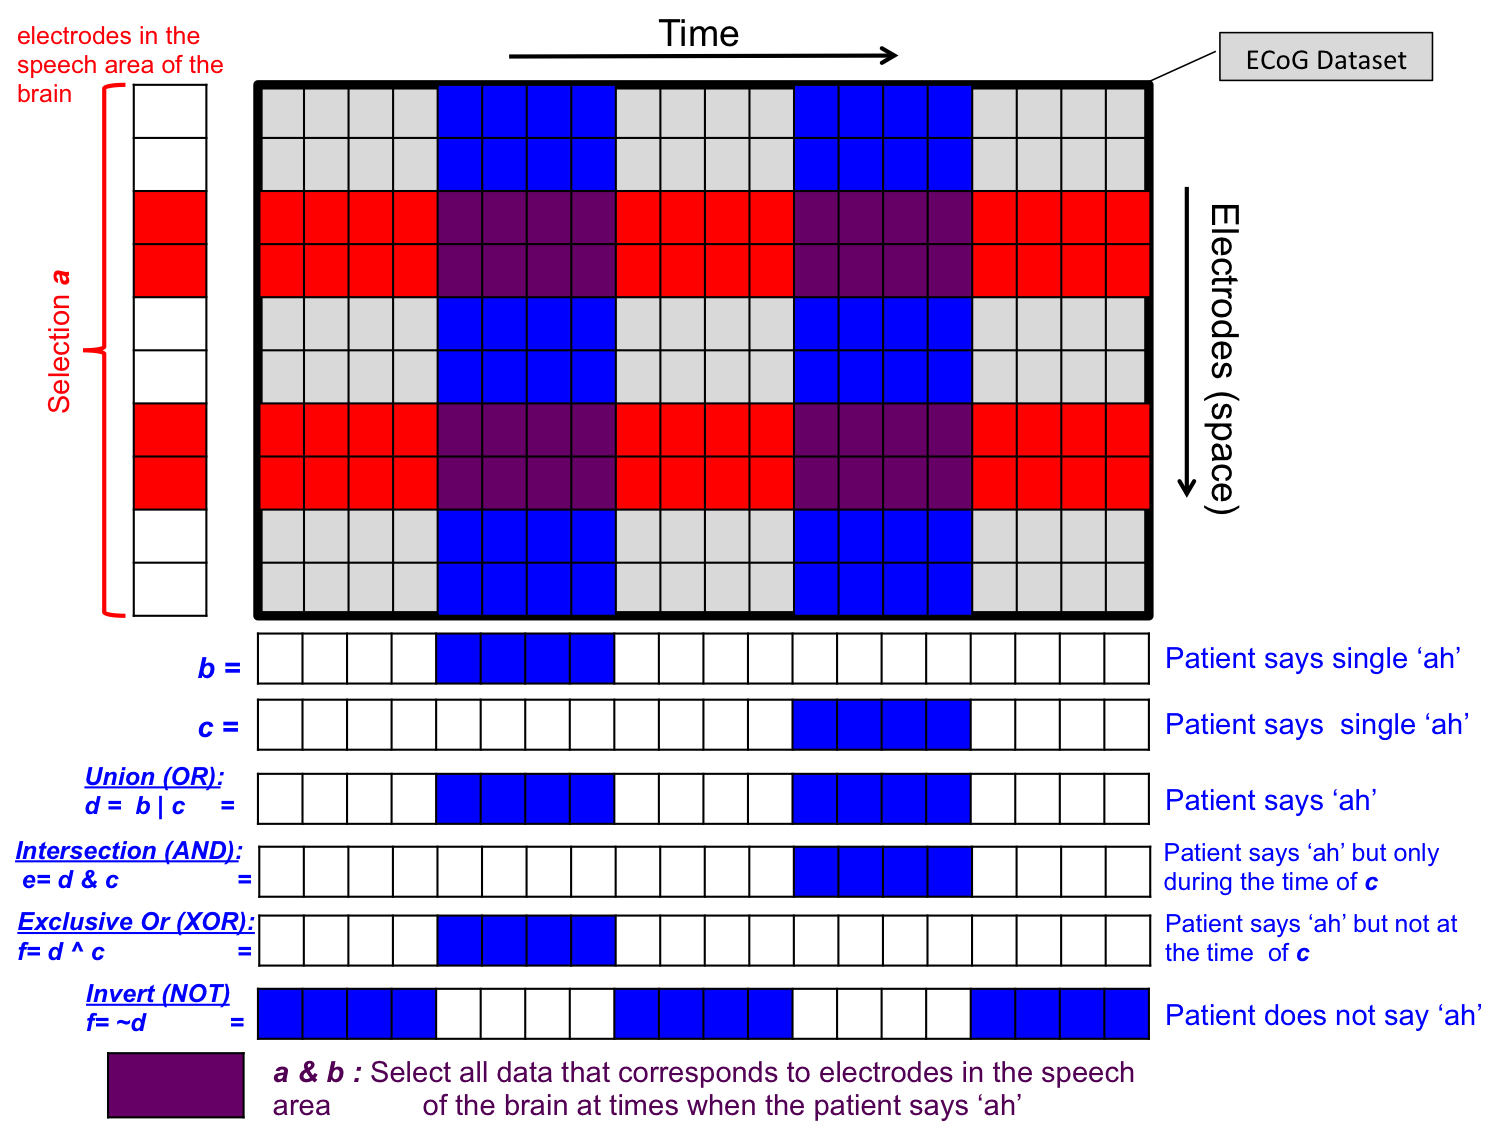

In [71]:
Image(filename="brainformat_brief_introduction/data_selections_1.png", width=700)

The `DataSelections` class also supports specification of arbitrary, n-dimensional selections via the concept of global selections (indicated by `axis=-1`). Arbitrary selections are defined by a full boolean-map describing for each data record of the target dataset whether the record is selected (True) or not (False). As such, depending on the size of the dataset, the overhead for storing, merging, and applying arbitrary selections may be high. The figure below illustrates some selections that cannot be defined by intersections of arbitrary, axis-aligned selections, i.e, selections that are represented as global selections (-1 axis).

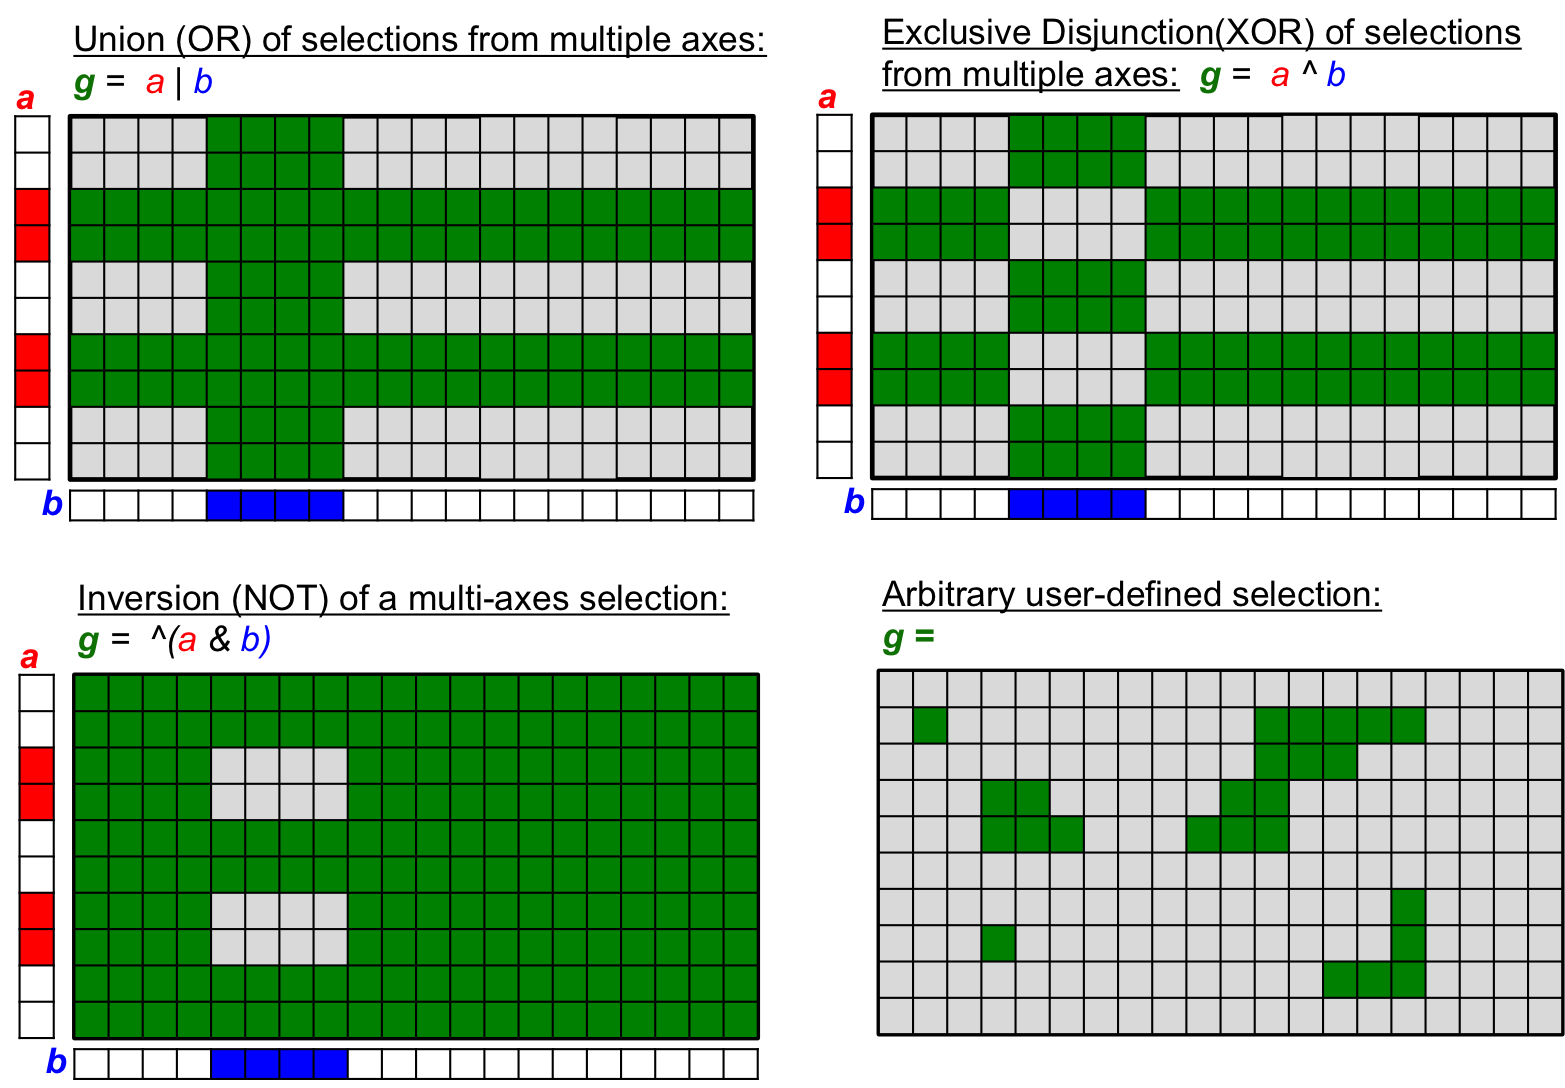

In [72]:
Image(filename="brainformat_brief_introduction/data_selections_2.png", width=700)

### How are Collection of Annotations Stored?

Collections of annotations are managed using the `AnnotationCollections` and `AnnotationDataGroup` class. Collections of annotations combine the data structures of the individual annotation into coherent structures to support filtering/search more efficiently. The core data structure for collections of annotations consists of the following elements:

* `data_object` : The data object for which the annotations are defined, e.g., a h5py.Dataset, numpy array, or ManagedObject that act like a dataset (i.e, support .shape and slicing)
* `annotation_types` : 1D (vlen str) dataset with the list of all available annotation types (h5py.Dataset or numpy array)
* `annotation_type_indexes`: 1D h5py.Dataset or numpy array with the index into the annotation_types array indicating for each annotation the corresponding annotation type.
* `descriptions`: h5py.Dataset or numpy array with the annotation descriptions
* `selection_indexes:` h5py.Dataset or numpy array with the indexes of the selections that apply. This is a 2D dataset of shape (#annotations, #axes+1). The axes dimension is ordered as [-1,0,1,...] (-1 indicates global selection across all axes, whereas 0 ... n indicates selection along individual axes.
* `selections`:  dict of h5py.Datasets or numpy arrays with all possible selections. The keys of dict are the axis indexes [-1,0,1,...], i.e., we store a n+1 datasets each describing all selection for a given axis. In the HDF5 file we then have n+1 datasets, each of which stores all selections defined for a single axes. The HDF5 datasets are usually 2D: i) the frist dimensions are the selections, and ii) the second dimension is as long as the axes for which the selections are defined. A special case is the -1 axis (i.e., global selection), here the dataset is (n+1) dimenional as each selection is defined by an n-dimenions array.
* `collection_description`: String with a description of the annotation collection